# Train sizing
---------------------------------

This example shows how to asses a model's performance based on the size of the training set.

The data used is a variation on the Australian weather dataset from https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. The goal of this dataset is to predict whether or not it will rain tomorrow training a binay classifier on target RainTomorrow.

## Load the data

In [1]:
# Import packages
import numpy as np
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Load the Australian weather dataset
X = pd.read_csv('./datasets/weatherAUS.csv')

# Let's have a look at the data
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Run the pipeline

In [3]:
# Initialize ATOM and prepare the data
atom = ATOMClassifier(X, verbose=2, random_state=1)
atom.clean()
atom.impute(strat_num='median', strat_cat='most_frequent', min_frac_rows=0.8)
atom.encode()

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ================== >>
Shape: (142193, 22)
Missing values: 316559
Categorical columns: 5
Scaled: False
-----------------------------------
Train set size: 113755
Test set size: 28438
-----------------------------------
Dataset balance: No:Yes <==> 3.5:1.0
-----------------------------------
Distribution of classes:
|     |   dataset |   train |   test |
|:----|----------:|--------:|-------:|
| No  |    110316 |   88263 |  22053 |
| Yes |     31877 |   25492 |   6385 |

Applying data cleaning...
 --> Label-encoding the target column.
Fitting Imputer...
Imputing missing values...
 --> Dropping 15182 rows for containing less than 80% non-missing values.
 --> Imputing 100 missing values with median in feature MinTemp.
 --> Imputing 57 missing values with median in feature MaxTemp.
 --> Imputing 640 missing values with median in feature Rainfall.
 --> Imputing 46535 missing values with medi

In [4]:
# We can analyze the impact of the training set's size on a LightGBM model
atom.train_sizing('lgb', train_sizes=np.linspace(0.1, 1, 10), bagging=4)


Training ===================================== >>
Models: LGB
Metric: f1


Run: 0 ================================ >>
Size of training set: 10164 (10%)
Size of test set: 25366


Results for LightGBM:         
Fit ---------------------------------------------
Train evaluation --> f1: 0.8179
Test evaluation --> f1: 0.6092
Time elapsed: 0.000s
Bagging -----------------------------------------
Evaluation --> f1: 0.5920 ± 0.0024
Time elapsed: 0.000s
-------------------------------------------------
Total time: 0.000s


Final results ========================= >>
Duration: 0.000s
------------------------------------------
LightGBM --> f1: 0.592 ± 0.002 ~


Run: 1 ================================ >>
Size of training set: 20329 (20%)
Size of test set: 25366


Results for LightGBM:         
Fit ---------------------------------------------
Train evaluation --> f1: 0.7440
Test evaluation --> f1: 0.6234
Time elapsed: 0.000s
Bagging -----------------------------------------
Evaluation --> f1: 0.61

## Analyze the results

In [5]:
# The results dataframe now is multi-index
atom.results

,,metric_train,metric_test,time_fit,mean_bagging,std_bagging,time_bagging,time
frac,model,,,,,,,
0.1,LGB0,0.817852,0.60916,0.000s,0.592008,0.00240723,0.000s,0.000s
0.2,LGB1,0.744018,0.623409,0.000s,0.611083,0.00359688,0.000s,0.000s
0.3,LGB2,0.709584,0.630853,0.000s,0.62052,0.00256971,0.000s,0.000s
0.4,LGB3,0.693374,0.632718,0.000s,0.624846,0.00418664,0.000s,0.000s
0.5,LGB4,0.683844,0.637217,0.000s,0.624575,0.00629896,0.000s,0.000s
0.6,LGB5,0.68072,0.639012,0.000s,0.631484,0.00359773,0.000s,0.000s
0.7,LGB6,0.677526,0.640312,0.000s,0.636251,0.00291042,0.000s,0.000s
0.8,LGB7,0.673214,0.637478,0.000s,0.634215,0.00267483,0.000s,0.000s
0.9,LGB8,0.666742,0.64163,0.000s,0.638174,0.0039345,0.000s,-0.000s


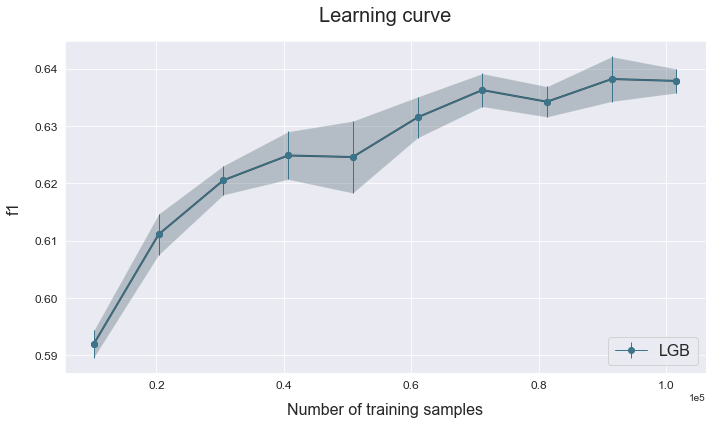

In [6]:
# Plot the train sizing's results
atom.plot_learning_curve()